# <center><u>Introduction to data analysis using Python<u></center>
### <center>July 21-22th, 2024</center>
### <center>Eitan Hemed, PhD</center>
### <center>Department of Psychology, University of Haifa</center>


---
<p align="center">
 <b> All materials and exercise solutions are available on </b>
<a style="font-weight:bold" href="https://github.com/EitanHemed/python-workshop-2023">Github</a>
</p>


In the previous part we got to know the fundamentals of Python. In the rest of the workshop, we'll begin our introduction to data analysis using Python. We'll begin by how data is organized and manipulated, how to plot our data and finally how to run common statistical tests.

# NumPy

NumPy ("Numerical Python") is not part of the standard library, meaning that this is a package that you need to install (specifically on Google Colab, it was already installed for you). However, it  is fundemental to almost all Python packages used for scientific or data-related work (espcially when working with small to medium-sized data). NumPy is used in other packages dedicated to wrangling and organizing data, plotting data, analyzing data and many more (see [here](https://numpy.org/)).

----

Aside from many mathematical functions, NumPy provides a data structure called an array.

NumPy Arrays (called N-Dimensional arrays, or ndarray for short), NumPy arrays are an ordered mutable collections, that are intended for numerical computation. As the name implies they can be of any number of dimensions (1D, 2D, 3D, up to 32D at the moment).

---


![](https://www.physicsforums.com/attachments/1614347010838-png.278712/)

[image source](https://www.physicsforums.com/attachments/1614347010838-png.278712/)

To begin using NumPy, we first have to import it. The common alias for importing NumPy is the following:

In [ ]:
import numpy as np

Here is a 1-d array:

In [ ]:
a = np.array([1, 2, 3, 5 ])
print(a)

Although our array looks like a plain list. NumPy arrays have many features that makes them more useful than lists in many cases. For example, scaler and vector operations out of the box:

In [ ]:
a = np.array([1, 2, 3, 5 ])
print(a + 2,
      a ** a, sep='\n')

Built-in methods for common operations:

In [ ]:
print(a.mean(), a.std())

You might have heard that Python is a readable language at the expanse of execution speed. However, NumPy is much faster than vanilla Python, sometimes by orders of magnitude.

In [ ]:
_array = np.arange(1e5) # An array with all integers between 0 and 100,000 (end-exclusive)
_list = list(range(int(1e5))) # A list with all integers between 0 and 100,000 (end-exclusive)

print("Vanilla Python: ")
%timeit sum(_list)

print("NumPy: ")
%timeit np.sum(_array)

One of the reasons that NumPy is very fast has to do with how memory is allocated for Python objects vs. NumPy arrays can store only a single type of values in an array. Objects are coerced into a different data type if they are not the same as the array.



In [ ]:
a = np.full(5, True) # Creating an array of 5 elements, all are True
print(a) # all elements are booleans
a[-1] = 0
print(a) # the last element is coerced into a boolean as well

The same goes for strings.

In [ ]:
a = np.linspace(start=-5, stop=5, num=10).round(2) # Get evenly spaced numbers
print(a, a.dtype) # the default type is float
a[3:5] = ['105.3', '7.7']
print(a, a.dtype) # the 4th and 5th elements are coerced into floats.

#### Shape and indexing.

NumPy arrays can contain be built across multiple dimensions. This allows us to create complex and flexible data structure.

Let's create an array with two dimensions - 3 rows and 4 columns. 

In [ ]:
three_by_four = np.ones(shape=(3, 4)) # (y, x)
print(three_by_four,
      "\nThe shape is: ", three_by_four.shape)

One thing you need to get used to is that the first dimension is the rows, and the second is the columns (Y, X).

Now we can begin selecting the array elements using both dimensions. Indexing of arrays with complex shapes is a breeze. 

Here we select the first and third rows (`0::2`), and all columns except the first (`1:`).

In [ ]:
three_by_four[0::2, 1:] = 0
print(three_by_four)

#### $\color{dodgerblue}{\text{Exercise}}$

We can change the shape of an array using the `reshape` method. First, create an array of the values 1 through 48 using `np.arange`. Then, reshape it into a different shape with 3 or more dimensions.

Note that in order to fit all elements the *product of the size of all axis* must equal the *total number of elements in the array*.

In [12]:
a = np.arange(1, 49)
print(a.shape)

a = a.reshape(3, 4, 4)
print("The new shape is:", a.shape)
print("The product of the dimensions is:", np.product(a.shape))

(48,)
The new shape is: (3, 4, 4)
The product of the dimensions is: 48


#### $\color{dodgerblue}{\text{Exercise}}$

One useful wildcard in reshaping is `-1`. This wildcard tells NumPy to infer the size of the axis from the other axes.

Repeat the exercise above, now reshaping the array into any 3D shape, but use `-1` anywhere in the `reshape` method.

In [13]:
a = np.arange(0, 36)
print("Elements in a:", a.size)

a = a.reshape(-1, 3, 4)
print("The new shape of a is:", a.shape)
print("The product of the dimensions is:", np.product(a.shape))

Elements in a: 36
The new shape of a is: (3, 3, 4)
The product of the dimensions is: 36


One thing to mention regarding arrays shapes, is that they control our ability to work with different arrays. We've seen that we can add or multiply all values of an array in a scaler, or add a similar shaped array to another. But what happens when we try to add two arrays with different shapes?

Numpy requires that shapes will match in the following fashion - either the size of a dimension is 1, or it is the same size as the other array. If the two arrays have different number of dimensions, then NumPy tries to match them beginning from the last dimension and proceeding backwards.

In [17]:
a = np.ones(shape=(2, 1))
b = np.ones(shape=(3, 2, 1))
print(a + b)

[[[2.]
  [2.]]

 [[2.]
  [2.]]

 [[2.]
  [2.]]]


If the shapes of the two arrays do not match, consider reshaping them to match. If that's not possible due to the number of elements you could possibly pad the arrays with some values to make them match. If you happen to work with images, you will see that this is a common practice.

### Boolean Indexing

Another thing we will touch upon regarding NumPy array is Boolean Indexing. In boolean indexing we are using truth values to index an array. When NumPy arrays are checked for their truth values they (usually) return the value for each element. This is not especially complicated but it is a crucial topic when working with data frames, covered later. 


In [18]:
x = np.array([-1, -15, 17, -7, 256]) # Use a list to create an array
boolean_indices_of_positive_values_in_x = x > -1
print("Positive values:", boolean_indices_of_positive_values_in_x)
print(x[boolean_indices_of_positive_values_in_x])

Positive values: [False False  True False  True]
[ 17 256]


#### $\color{dodgerblue}{\text{Exercise}}$

Create an array of 10 numbers, and use `np.where` to find the *indices* of the positive values in the array.

In [19]:
a = np.arange(-5, 5)
print(np.where(a > 0))

(array([6, 7, 8, 9], dtype=int64),)


#### $\color{dodgerblue}{\text{Exercise}}$

Create a 5 (rows) by 7 (columns) array of random numbers. Here we use the NumPy `random` module, to create an array from a uniform distribution.

In [20]:
np.random.seed(42) # So we would get the same numbers on each run.
five_by_seven = np.random.random_sample(size=(5, 7))
print(five_by_seven)

[[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
  0.05808361]
 [0.86617615 0.60111501 0.70807258 0.02058449 0.96990985 0.83244264
  0.21233911]
 [0.18182497 0.18340451 0.30424224 0.52475643 0.43194502 0.29122914
  0.61185289]
 [0.13949386 0.29214465 0.36636184 0.45606998 0.78517596 0.19967378
  0.51423444]
 [0.59241457 0.04645041 0.60754485 0.17052412 0.06505159 0.94888554
  0.96563203]]


As a side not, nowadays, it is recommended to use `np.random.default_rng` instead of `np.random.seed`. For the purpose of this workshop, we will use `np.random.seed` to ensure reproducibility.

```
rn = np.random.default_rng(seed=42)
five_by_seven = rn.random(size=(5, 7))
print(five_by_seven)
```

Multiply the array by 100 and round the values to 2 decimal points.

In [25]:
five_by_seven = (five_by_seven * 100).round(2) # or use np.round(a, d)
print(five_by_seven)

[[37.45 95.07 73.2  59.87 15.6  15.6   5.81]
 [86.62 60.11 70.81  2.06 96.99 83.24 21.23]
 [18.18 18.34 30.42 52.48 43.19 29.12 61.19]
 [13.95 29.21 36.64 45.61 78.52 19.97 51.42]
 [59.24  4.65 60.75 17.05  6.51 94.89 96.56]]


Select all rows and the first 3 columns.

In [26]:
print(five_by_seven[:, :3])

[[37.45 95.07 73.2 ]
 [86.62 60.11 70.81]
 [18.18 18.34 30.42]
 [13.95 29.21 36.64]
 [59.24  4.65 60.75]]


Aggregate the array by taking the maximum value along all rows (axis 0), in order to get the maximum value on each column (axis 1). How many values should you expect to get?

In [27]:
print(five_by_seven.max(axis=0))

[86.62 95.07 73.2  59.87 96.99 94.89 96.56]


Aggregate the array by finding the median value of each row. How many values should you expect to get?

In [28]:
# Display vals min along rows (aggregating on columns)
print(np.median(five_by_seven, axis=1))

[37.45 70.81 30.42 36.64 59.24]


#### $\color{dodgerblue}{\text{Exercise}}$

Using the `five_by_seven` array, find the values that are greater than 50.


In [29]:
five_by_seven[five_by_seven > 50]

array([95.07, 73.2 , 59.87, 86.62, 60.11, 70.81, 96.99, 83.24, 52.48,
       61.19, 78.52, 51.42, 59.24, 60.75, 94.89, 96.56])

#### $\color{dodgerblue}{\text{Exercise}}$
Using the `five_by_seven` array, find the values that are greater than 50, and less than 70.

In [30]:
five_by_seven[(five_by_seven > 50) & (five_by_seven < 70)]

array([59.87, 60.11, 52.48, 61.19, 51.42, 59.24, 60.75])

#### $\color{dodgerblue}{\text{Exercise}}$
Now, find the indices of the values that are greater than 50, and less than 70.

In [31]:
indices_of_target_values_on_all_columns = np.argwhere((five_by_seven > 50) & (five_by_seven < 70))

In [32]:
# Rows and columns
print(indices_of_target_values_on_all_columns)

[[0 3]
 [1 1]
 [2 3]
 [2 6]
 [3 6]
 [4 0]
 [4 2]]


#### $\color{dodgerblue}{\text{Exercise}}$
Continue by selecting only the values that are on the first and last columns, but do not exclude any rows.

In [33]:
target_values_on_relevant_columns = np.isin(indices_of_target_values_on_all_columns[:, 1], [0, 6])
target_values_on_relevant_columns

array([False, False, False,  True,  True,  True, False])

In [34]:
# Now use the (row, column) indices to change the values to np.nan
indices_of_target_values_to_modify = indices_of_target_values_on_all_columns[target_values_on_relevant_columns]
five_by_seven[indices_of_target_values_to_modify[:, 0],
    indices_of_target_values_to_modify[:, 1]] = np.nan

In [35]:
five_by_seven

array([[37.45, 95.07, 73.2 , 59.87, 15.6 , 15.6 ,  5.81],
       [86.62, 60.11, 70.81,  2.06, 96.99, 83.24, 21.23],
       [18.18, 18.34, 30.42, 52.48, 43.19, 29.12,   nan],
       [13.95, 29.21, 36.64, 45.61, 78.52, 19.97,   nan],
       [  nan,  4.65, 60.75, 17.05,  6.51, 94.89, 96.56]])

`np.nan` is a special value that represents "Not a Number". It is used to represent missing values in NumPy arrays. If you want NumPy to ignore `np.nan` values, you can use predefined functions that do so, such as `np.nanmax`, `np.nanmin`, `np.nanmean` etc. If you do not use these functions, you will get `np.nan` as a result.

In [36]:
(np.max(five_by_seven), np.nanmax(five_by_seven))

(nan, 96.99)

You can also use `np.isnan` to find the indices of the `np.nan` values, and exclude them, or replace them with a different value.

#### $\color{dodgerblue}{\text{Exercise}}$
Use `np.isnan` to find the indices of the `np.nan` values, and replace them with the mean value of the array.

In [ ]:
five_by_seven[np.isnan(five_by_seven)] = np.nanmean(five_by_seven)

Print the proportion of NaN values in the array, using `np.isnan`:

In [ ]:
np.isnan(five_by_seven).mean()

NumPy contains many more functionalities than what we covered here. However, if you have a good grasp on the basics of working with arrays (broadcasting, shapes, boolean indexing, etc.), you should be able to begin utilizing NumPy in your work, as we'll see in the next sections.

# Matplotlib

Matplotlib is the major library for scientific plotting in Python, that serves as backend to more high-level plotting libraries (one of them we'll use later). 
Naturally (and espcially if you ever used MatLab), you would want to use matplotlib like it is used below. However, Matplotlib offers a much more flexible way to draw plots, which we'll learn on this tutorial.

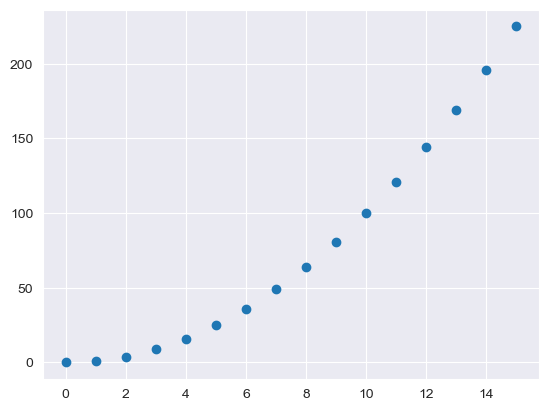

In [37]:
import matplotlib.pyplot as plt
import numpy as np

a = np.arange(0, 16)
b = np.power(a, 2)

plt.scatter(a, b)

The recommended way to use Matplotlib is by interacting with objects. This can give you fine-grained control, and better code modularity.

A figure is similar to an image - a collection of (usually) one or more axes. Axes are what you would usually call plots - a painted region with some associated data. Axes contain the plots we would draw - lineplots, scatterplots, boxplots etc.

---

![image source](https://matplotlib.org/stable/_images/sphx_glr_anatomy_001_2_00x.png)

[image source](https://matplotlib.org/stable/gallery/showcase/anatomy.html)


This is the common idiom for creating an axes.

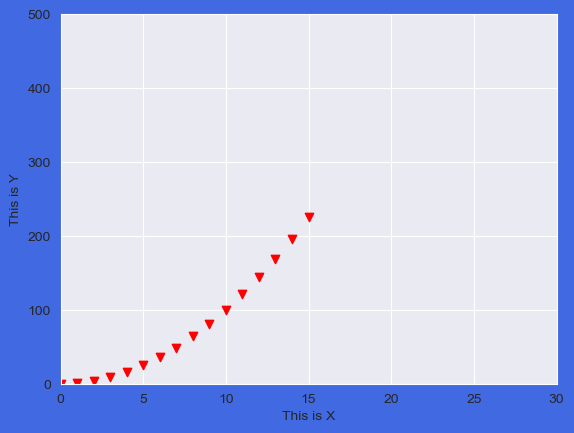

In [40]:
fig, ax = plt.subplots()

# We can change the figure parameters
fig.set_facecolor('royalblue')

# We can change the ax parameters
ax.set(xlabel='This is X', ylabel='This is Y', xlim=[0, 30],
       ylim=[0, 500])

# We can draw objects into ax, controlling the drawing specs
ax.scatter(a, b, c='red', marker='v')

# And save the figure to a file
fig.savefig('myplot.jpg')

#### Multiple axes

However, the real flexibility of this idiom is revealed when we want to plot over more than one axes.

<class 'numpy.ndarray'>
(2, 3)


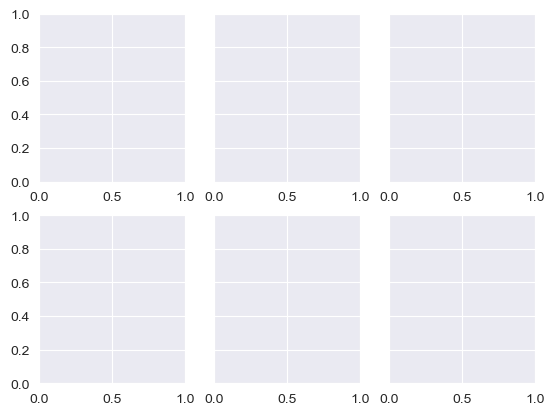

In [41]:
# axs, as we are creating more than one
fig, axs = plt.subplots(nrows=2, ncols=3, sharey=True) 

print(type(axs))
print(axs.shape)

`axs` is actually a 2D NumPy array - rows (0) and columns (1).

#### $\color{dodgerblue}{\text{Exercise}}$

Create a figure with a 2 X 3 array of axes. Plot some random data on the middle axes in the lower row.

In [ ]:
fig, axs = plt.subplots(2, 3)

a = np.random.random_sample((10, ))

axs[1, 1].plot(a)

Often times, we want to plot different groups on different plots. The main idiom to do it is using a `for` loop with `zip`. 

```
for group_data, ax in zip(all_data, axs):
    ax.hist(group_data)
```

#### $\color{dodgerblue}{\text{Exercise}}$

We will simulate a small dataset, of four groups, with 20 samples for each of the groups, drawn from different normal distributions.

Next we will plot a histogram of the data on four different axes, each with a different title for each group.

This exercise requires some manual work and googling to find the right functions. Usually, you can find the right function by googling. For example, if you want to plot a histogram, you can google "matplotlib histogram" or "numpy normal distribution", and you will find the right function.

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem

np.random.seed(99)

# Create a dictionary with the data for each group. You will decide on the properties of the distrubtion for each group, except for the number of samples. 
data = {
    'Group A': np.random.normal(loc=7, scale=3, size=20),
    'Group B': np.random.normal(loc=10, scale=3, size=20),
    'C': np.random.normal(loc=10, scale=9, size=20),
    'D': np.random.normal(loc=20, scale=3, size=20),
}

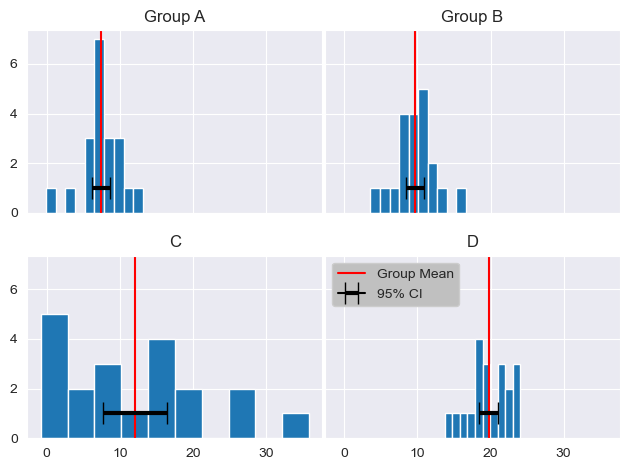

In [45]:
# Creating a figure with 2 X 2 axes, with shared x and y axes, to ensure the range of values on each plot is the same.
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)


# `flat` Returns a flattened array (1D, so we can zip it with the matching keys), otherwise - we would have a 2 X 2 array
for group_name, ax in zip(data, axs.flat):
    
    # Create a histogram of the values
    ax.hist(data[group_name])
    
    # Mark the mean of the dataset.
    ax.axvline(data[group_name].mean(), c='red', label='Group Mean')

    # Calculate standard error of the mean and turn into 95%-CI  
    ax.errorbar(x=data[group_name].mean(), 
                y=1,
                xerr=1.96 * sem(data[group_name]),
                c='black', capsize=8, elinewidth=3,
                label='95% CI'
                )

    ax.set_title(group_name)

# Add a legend only to the last ax.
ax.legend(facecolor='silver', framealpha=1)

# Removes empty "width" space, makes axes wider (`h_pad` for "height")
fig.tight_layout(w_pad=0.2) 

Matplotlib has many other features and plots, we merely scratched the surface. However, unless you want super-customized plots, you can usually find a solution online and copy-paste it to your code.

Here is the matplotlib [gallery of examples](https://matplotlib.org/stable/gallery/index.html), [tutorials for specific tasks](https://matplotlib.org/stable/tutorials/index.html), and a quick [styles sheet](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html), in case you want more aesthetically pleasing plots.

Some of the work we did in this section was manual and can be skipped using higher-level tools (espcially one we will cover at a later point), however it is crucial to understand the basics of matplotlib so you can take control over your plotting.

It should be mentioned that for specific tasks and fields, there are often specialized tools. To name a few:
* For big data, there is [Datashader](https://datashader.org/), [Holoviews](https://holoviews.org/) and [Plotly](https://plotly.com/python/).
* For statistical plots, there is [Seaborn](https://seaborn.pydata.org/), which is built on top of matplotlib.

# Pandas

pandas ('panel-data') is the main library for working with tabular data in Python on small data sets (as a rule of thumb, less than several GBs; that being said, in recent years it got more performant).

Before learning how to read data into Pandas, or exporting it out of Pandas, we will get to know the main data structures in Pandas.

One note about Pandas is that there is usually more than one way to do things. Depending on the context some way might be better fit than others.

----

The main object you will work with in Pandas is a dataframe (`pd.DataFrame`).
A dataframe is basically a table, but it offers much more than just a 2D matrix of values.

![](https://media.geeksforgeeks.org/wp-content/cdn-uploads/creating_dataframe1.png)


([source](https://media.geeksforgeeks.org/wp-content/cdn-uploads/creating_dataframe1.png))



## pandas.Series

A dataframe is composed of columns, each series is 1-D nd-array, with axis labels. We can create a series from a list of an array of values.

In [46]:
import pandas as pd

student_grades = pd.Series(
    data=np.random.normal(90, 1.5, size=5), 
    index=list('ABCDE'), name='student_grades'
)
print(student_grades)

A    88.300164
B    89.581371
C    92.094930
D    90.048329
E    86.079509
Name: student_grades, dtype: float64


Under the hood, a Series is a numpy array, with an index. We can access the values and the index separately.

In [47]:
print(
    type(student_grades),
    type(student_grades.values), sep='\n'
    )


<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [48]:
print(student_grades.index, type(student_grades.index), sep='\n')

Index(['A', 'B', 'C', 'D', 'E'], dtype='object')
<class 'pandas.core.indexes.base.Index'>


#### $\color{dodgerblue}{\text{Exercise}}$

Create a series of floats, then access the first value and turn it into a string. Then print the series to see the change. Next, print the type of each value in the series.

In [49]:
s = pd.Series([4., 8.0, 15.0, 16.0, 23.0, 42.0])
print(s)

0     4.0
1     8.0
2    15.0
3    16.0
4    23.0
5    42.0
dtype: float64


In [50]:
s[0] = "Some float"
print(s)

0    Some float
1           8.0
2          15.0
3          16.0
4          23.0
5          42.0
dtype: object


Note that the data type of the series has changed to `object`, which is the most general type in Python. This is in contrast with NumPy arrays, which are homogenous.

Use the `Series.apply` method to apply a function to each value in the series, and reveal its type.

In [51]:
s.apply(type)

0      <class 'str'>
1    <class 'float'>
2    <class 'float'>
3    <class 'float'>
4    <class 'float'>
5    <class 'float'>
dtype: object

When Pandas encounters a Series with mixed data types, it will use the most general type to represent the series, which is `object`.
However, it is not recommended to mix data types in a Series, as it can cause unexpected behavior and slows down computations.

#### $\color{dodgerblue}{\text{Exercise}}$

To reverse this change, we will find the index of the value we changed, and use it to replace the value with a float.

In [52]:
s[s.apply(type) == str] = 4.0
print(s)

0     4.0
1     8.0
2    15.0
3    16.0
4    23.0
5    42.0
dtype: object


It seems that the dtype of the series is still `object`. Use the `Series.astype` method to change the dtype of the series to `float`.

In [53]:
s = s.astype(float)
print(s)

0     4.0
1     8.0
2    15.0
3    16.0
4    23.0
5    42.0
dtype: float64


Maintaining all the values in a series as the same data type is crucial for performance. If you mix data types in a series, you will lose the speed benefits of using Pandas.

## pandas.DataFrame

A data frame is a collection of series objects, known as columns. Dataframes are potentially heterogeneous, unlike arrays, as each column can have its own data type(s).

----

We will now create a dataframe, but we will not give it any special column names (label-based identifier for columns - axis 1) or row names (index - label based
identifier for rows - axis 0). 

In [54]:
# Create 5 columns of 20 values each, sampled from a random distribution
import numpy as np
import pandas as pd
random_numbers_df = pd.DataFrame(
    data=np.random.normal(size=(3, 5)))

In [55]:
# Add a 6th column that contains random strings
random_numbers_df[5] = np.random.choice(['dog', 'cat', 'bear', 'bird'],
                                     size=random_numbers_df.shape[0])

print(random_numbers_df,
      random_numbers_df.columns,
      random_numbers_df.index, sep='\n\n')

          0         1         2         3         4     5
0 -1.001578 -0.567511 -0.225658  0.938024  0.836784   cat
1  0.812148  0.232307 -0.295108 -0.361676  0.432115  bear
2  0.933959  1.552634  0.093623  0.294826  1.485431  bear

RangeIndex(start=0, stop=6, step=1)

RangeIndex(start=0, stop=3, step=1)


We can get some information on our dataframe using `df.info` e.g., the numebr of null values on each column, their names and data types.

In [56]:
random_numbers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       3 non-null      float64
 1   1       3 non-null      float64
 2   2       3 non-null      float64
 3   3       3 non-null      float64
 4   4       3 non-null      float64
 5   5       3 non-null      object 
dtypes: float64(5), object(1)
memory usage: 272.0+ bytes


#### $\color{dodgerblue}{\text{Exercise}}$
Referring to columns using an integer index doesn't add much over arrays. This is way we can use column names.

Change the name of the dataframe columns using multiple ways. Print the new column names after each change to see what happened.
*   First using assignment on creation.
*   Second, update the column names by using the `pd.DataFrame.rename` method (e.g., change names, capitalization, etc.).


In [57]:
column_names = ['Course', 'Term', 'Average', 'Year']

data_by_terms = [
          ('Python 101', 'Fall', 95, 2021),
          ('Python 101', 'Spring', 85, 2020),
          ('Python 101', 'Fall', 90, 2019),
          ('Python 102', 'Fall', 95, 2021),
          ('Python 102', 'Summer', 100, 2020),
          ('Python 102', 'Fall', 90, 2019),
    ]


course_grades = pd.DataFrame(
    data=data_by_terms, columns=column_names)

print(course_grades)

       Course    Term  Average  Year
0  Python 101    Fall       95  2021
1  Python 101  Spring       85  2020
2  Python 101    Fall       90  2019
3  Python 102    Fall       95  2021
4  Python 102  Summer      100  2020
5  Python 102    Fall       90  2019


#### $\color{dodgerblue}{\text{Exercise}}$
The columns on the dataframe are not renamed after running this cell. Can you explain why?

In [60]:
rename_columns_dict = dict(zip(course_grades.columns,
             ['Course Name', 'Semester', 'Mean Grade', 'Date']))

course_grades.rename(rename_columns_dict, axis=1) # can be replaced with course_grades.rename(columns=rename_columns_dict)

print(course_grades.columns)


Index(['Course', 'Term', 'Average', 'Year'], dtype='object')


In [61]:
course_grades.rename(rename_columns_dict, axis=1, inplace=True)
## vs. 
# course_grades = course_grades.rename(rename_columns_dict, axis=1)

In [62]:
print(course_grades.columns)

Index(['Course Name', 'Semester', 'Mean Grade', 'Date'], dtype='object')


The crux of the previous exercise was that in Pandas, you have to be aware what are the effects of your actions.

Many of the functions return a copy of the dataframe with the additional change from the function call, rather than change it in place by default. You can always reassing the result of the function call to the original variable, or use `inplace=True` when calling a method like `rename`. This is a matter of choice, but there are [debates](https://github.com/pandas-dev/pandas/issues/16529) for and against it.

### Selection

In pandas you can select columns, rows or both in multiple ways.

To demonstrate and practice it we will load an example dataset from a library that we'll get to know later.
The dataset is called `mpg` and contains information about cars, such as their fuel consumption, number of cylinders, etc. It can be used to show the different selection methods, as it contains both numeric and string columns.

In [63]:
import seaborn as sns

mpg = sns.load_dataset('mpg')

print(mpg.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


In [64]:
mpg.head(5) # prints the first 5 rows,

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [65]:
mpg.describe() # prints some statistics on the numeric columns

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000



#### Integer-location based indexing

Our first method of selecting data is using the `df.iloc` method.

`iloc` stands for integer-location. We know that a dataframe is in some sense a collection of NumPy arrays, and we know how to index 2-D arrays. So we know how to use iloc.

In [66]:
mpg.iloc[0, -1] # This returns the first row, last column

'chevrolet chevelle malibu'


#### $\color{dodgerblue}{\text{Exercise}}$

Fill the code below to select every third row (axis=0), beginning with the third one, and every other column (axis=1) in the dataframe.

In [67]:
mpg.iloc[2::3, ::2]

,mpg,displacement,weight,model_year,name
2,18.0,318.0,3436,70,plymouth satellite
5,15.0,429.0,4341,70,ford galaxie 500
8,14.0,455.0,4425,70,pontiac catalina
11,14.0,340.0,3609,70,plymouth 'cuda 340
14,24.0,113.0,2372,70,toyota corona mark ii
...,...,...,...,...,...
383,38.0,91.0,1965,82,honda civic
386,25.0,181.0,2945,82,buick century limited
389,22.0,232.0,2835,82,ford granada l
392,27.0,151.0,2950,82,chevrolet camaro


You can also use booleans with `iloc` to select rows or columns, or mix them with integers for different axis. This is useful when you want to select rows or columns based on a condition.

In [68]:
# #  6th row and below, only first and last columns
mpg.iloc[5:, [True, False, False, False, False, False, False, False, True]]

,mpg,name
5,15.0,ford galaxie 500
6,14.0,chevrolet impala
7,14.0,plymouth fury iii
8,14.0,pontiac catalina
9,15.0,amc ambassador dpl
...,...,...
393,27.0,ford mustang gl
394,44.0,vw pickup
395,32.0,dodge rampage
396,28.0,ford ranger


iloc is flexible, but can only be fed integers. It is pretty straightforward so we won't touch it next.
For more info take a look at the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html).

#### Label-based selection

The `loc` attribute of the dataframe can be used for label-based indexing. It can be used to retrieve single or multiple indices of rows or columns.

First, without using `loc`, we can retrieve a single column by using its name as an attribute of the dataframe, just like we did with a single row from a series.

In [69]:
mpg['origin'].tail(5)

393       usa
394    europe
395       usa
396       usa
397       usa
Name: origin, dtype: object

You can also use `mpg.origin` to get the same result, although alluring for newcomers, this is not recommended.
Aside from not being the convention, this can be problematic due to the following reasons (among others):
* You cannot retrieve a column this way if it has spaces in it (`df.total price`).
* You cannot store the column name in another variable. (`x = 'col_name'; df.x`)
* You cannot retrieve a couple of columns together.

In [70]:
mpg[['model_year', 'weight']] # You can retrieve multiple columns in a new order

,model_year,weight
0,70,3504
1,70,3693
2,70,3436
3,70,3433
4,70,3449
...,...,...
393,82,2790
394,82,2130
395,82,2295
396,82,2625


In [ ]:
mpg['model_year'] += 1900 # This is why reassignment works here.
mpg.head() # The original dataframe is changed.

However, this is pretty limited. We can't use it to select rows, let alone write complex queries to get just a selected part of our data. For that we can use `loc`.

In [ ]:
mpg.loc[:, ['mpg', 'model_year']] # Select all rows, only the mpg and model_year columns

Here is a more complex example, where we want to select only Toyota Corollas from the dataset.
Here we do it in two steps:
1. We create a boolean series that is `True` for the rows we want to select, and `False` for the rest.

In [ ]:
rows_where_torolla = mpg['name'] == 'toyota corolla'

2. We use this boolean series to select the rows we want.

In [ ]:
mpg.loc[rows_where_torolla, ['name', 'model_year', 'origin']]

#### $\color{dodgerblue}{\text{Exercise}}$
Select all the Volvo and Ford entries, that are from the year 1976 or later, and are not manufactured by Japanese companies.

In [ ]:
selected_group = mpg.loc[
        # Select non-japanese models
        (mpg['origin'] != 'japan') 
        # Models from 1976 or later
        & ~(mpg['model_year'] % 1900 > 75)
        # Find if the model name  contains 'volvo or ford'
        & (mpg['name'].str.contains('volvo|ford')) , :] # Select all columns, or only some of them

selected_group

`.loc` returns a copy of the dataframe, so we can modify it without changing the original dataframe. This is useful when we want to create a new dataframe from a subset of the original dataframe.

In [ ]:
selected_group.loc[selected_group['name'].str.contains('volvo'), 'origin'] = 'sweden'

In [ ]:
((selected_group['origin'] == 'sweden').any(),  # Some of the car origins are from Sweden
    (mpg['origin'] == 'sweden').any()) # None of the car origins are from Sweden

Note that the index of the dataframe is still preserved. So we can mutate this new dataframe and still use the original index, which may contain important information (e.g., timestamps, in time-series data).

You've noticed that we didn't use the regular `and` and `not` keywords when chaining arguments. Here you are required to use bitwise-operators.

The short version for what you should know is:
* When chaining conditions use parantheses.
* Instead of `and` use `&`
* Instead of `or` use `|`
* Instead of `not` use `~`

If you want the long version, go [here](https://towardsdatascience.com/bitwise-operators-and-chaining-comparisons-in-pandas-d3a559487525). 

### Setting and mutating

There are multiple ways by which you can update existing values in the dataframe or add new. 

#### $\color{dodgerblue}{\text{Exercise}}$
Setting with enlargement is a method in which we "try" to index inexistent indices and set their values. Create a new column called 'kpg' (kilometers per gallon; mpg multiplied by 1.609).

In [ ]:
mpg['kpg'] = mpg['mpg'] * 1.609
mpg.head()

The same goes for adding new rows. 

In [ ]:
# We are using some null values for Lada, as we don't have the mpg data
mpg.loc[mpg.shape[0]] = (
    # mpg, cylinders, displacement, horsepower, weight, acceleration, model_year, origin, name, kpg
    np.nan, 4, 95.69, 78, 2535.32, 23, 1977, 'soviet union', 'Lada Niva', np.nan)
mpg.tail()

#### $\color{dodgerblue}{\text{Exercise}}$
We can also set values for a specific row and column. Set the mpg value of the Lada Niva to 10, then update the kpg value accordingly.

In [ ]:
mpg.loc[mpg['name'] == 'Lada Niva', 'mpg'] = 10

In [ ]:
mpg.loc[mpg['name'] == 'Lada Niva', 'kpg'] = 10 * 1.609

As you've seen, we can use `loc` to update specific values in the dataframe in a flexible manner.

### GroupBy

"Group by" is a way to do one or more of the following steps: 
* Split the dataframe into groups.
* Apply a function to each group (e.g., calculate summary statistics).
* Recombine the results into a dataframe.



In [ ]:
# Here is a full split-apply-combine example
mpg.groupby(['origin', 'cylinders'], as_index=True)[['horsepower', 'weight']].median()

Let's break it down.

`groupby` takes column name(s) as the keys that are used for grouping. It returns a `DataFrameGroupBy` object, which is a special view of the dataframe. It doesn't actually do anything (like aggregating) until you apply a function to it, but you can extract specific groups from it.

In [ ]:
gb = mpg.groupby('origin')
gb.groups['japan'] # Returns the indices from the original dataframe

We can grab a specific group from the groupby object:

In [ ]:
usa = gb.get_group('usa')
usa.head()

We can apply all sorts of transformations or aggregations on the group.

The mean of each numeric column:

In [ ]:
print(usa.select_dtypes('number').mean())

The relative frequency of each non-numeric column:

In [ ]:
print(usa.select_dtypes('object').value_counts(
    normalize=True).mul(100).round(2).head(10), sep='\n')

And we can iterate over groups, which is a common matplotlib-pandas idiom.

In [ ]:
# First create the figure and axes
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)

# Then plot each group in a separate axes
for (group_name, group_df), ax in zip(gb, axs.flat):
    # Extract the values and transpose (reshape) from (n, 2) to (2, n)
    x, y = group_df[['acceleration', 'horsepower']].values.T
    ax.scatter(x, y, s=10, alpha=0.5)
    ax.set_title(group_name)
    # For annotation, add the correlation coefficient
    corr = group_df[['acceleration', 'horsepower']].corr().min().iloc[0]
    n = group_df.shape[0]
    ax.annotate(f'r({n}) = {corr:.2f}',
        xy=(0.525, 0.9,), xycoords='axes fraction')

fig.tight_layout()
fig.show()

And offers more control compared with the built-in plotting in pandas, which is much more useful for simple exploration. See [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html).

In [ ]:
ax = mpg.plot.scatter('acceleration', 'horsepower', )

correlation_between_acceleration_and_horsepower = mpg[['acceleration', 'horsepower']].corr().min().iloc[0]

ax.annotate(f'r({mpg.shape[0]}) = ' +
        f"{correlation_between_acceleration_and_horsepower:.2f}",
        xy=(0.525, 0.9,), xycoords='axes fraction', fontsize=14, c='red'),

#### $\color{dodgerblue}{\text{Exercise}}$

Aggregate the mean and standard deviation of models from USA and Japan, by `origin` and `cylinders`.

In [ ]:
grouped = mpg.loc[mpg['origin'].isin(['usa', 'japan'])].groupby(
    ['origin', 'cylinders'])[['mpg', 'horsepower']].agg(['mean', 'std']).round(2)

print(grouped.index.levels) # A two-level index
grouped.head()

The result is a `MultiIndex`ed data frame. Here are the basics. See more [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html).

----

Simple indexing, returning a column.

In [ ]:
grouped[('mpg', 'mean')]

The indexing with MultiIndex can get complex - here we select the mean of mpg for all cars from Japan, with 3 or 4 cylinders.

In [ ]:
# First we specify the first level of the index, then the second, then the column.
# Origin query (First level) > Cylinders query (Second level) > Column query
grouped.loc[(('japan'), (3, 4)), ('mpg', 'mean')]

Note that the origin and cylinders columns are now missing from the dataframe, they were turned into row indices (so far we only seen integers). We have shown how we can use them in reindexing operation. But sometimes we would want to return them to the data frame (e.g., if we want to use them on further analysis). 

In [ ]:
 # Note that this returns a new dataframe, we can also use `inplace` argument.
grouped.reset_index(level='origin')

Or skip this in the first place.

In [ ]:
mpg.groupby(['origin', 'cylinders'], as_index=False)

### Transform

Often we would want the aggregation operation to return a data structure that has the same dimensions as the original. For example, when we want to add summary statistics of each group or subject (e.g., think of an experiment with many trials per participant).

In [ ]:
weight_by_origin_gb = mpg.groupby('origin')['weight'].mean()
weight_by_origin_transform = mpg.groupby(
        'origin', sort=False)['weight'].transform('mean') # You can also use a function, rather than string - like np.mean, or some custom function

print(weight_by_origin_gb.shape,
      weight_by_origin_transform.shape, sep='\n')

`assign` is a method that returns a new dataframe with an additional column.

In [ ]:
mpg = mpg.assign(weight_by_origin=weight_by_origin_transform)

In [ ]:
european_manufacturer = mpg.loc[mpg['origin'] == 'europe']
(european_manufacturer['weight_by_origin'] - european_manufacturer['weight']).plot(kind='hist', bins=20)

#### Missing values

Note that we have a couple of `NaN` (used for missing values) on `horsepower`.

In [ ]:
mpg.info()

One way of imputation is to fill the missing values with some cetral tendency measure. We can do it with the mean or median, for example.



#### $\color{dodgerblue}{\text{Exercise}}$

Fill in the code below, returning the `horsepower` column where missing values will be filled with the dataset median for the column. 

In [ ]:
mpg['horsepower'].fillna(mpg['horsepower'].agg('median')).isna().any()

If we want to fill the missing values in the column using the mean of a specific group, here is one option.

In [ ]:
mpg['horsepower'] = mpg['horsepower'].fillna(mpg.groupby('cylinders')['horsepower'].transform(
    'mean')).values
mpg.describe().round(2)

### I / O

So far we either created our dataframes by hand, or imported them from a built-in dataset. However, usually you would be working on files.

Now is a good time to tell you that Colab runs on a Linux-based machine. As with any computer, we have folders. 

We can use the exclamation mark to run commands on the shell ("Command prompt") of our current machine. In general learning to work with the shell is a very useful skill for anyone working with files and data.

Here is the current folder contents, and the contents of the `sample_data` folder that colab offers us.

If you are not on Google Colab right now but downloaded the project, run the following code:

In [ ]:
import os
if not any(['COLAB' in k for k in os.environ.keys()]):
    os.chdir('..')

In [ ]:
ls . # Reveals the files in the current folder

In [ ]:
ls "./sample_data" # Reveals the files in the sample_data folder

We see that Colab offers us two famous datasets "mnist" and "california housing" (if you are not on Colab, you will only see the housing dataset). The files are split into training and testing datasets, so we can easily train a machine learning model to the training set and test on the test set.

We will use these files to demonstrate how we read and write data to and from files.

#### $\color{dodgerblue}{\text{Exercise}}$

Fill in the code below to load the california datasets. 

In [ ]:
housing_train = pd.read_csv('sample_data/california_housing_train.csv')
housing_test = pd.read_csv('sample_data/california_housing_test.csv')

print(housing_train.shape, housing_test.shape, sep='\n')

Here we combine the two files, by concatenating the two dataframes. 

In [ ]:
housing_combined = pd.concat(
    [housing_train, housing_test]
)
print(housing_combined.shape)
## Another option would be 
# df = train.append(test)

#### $\color{dodgerblue}{\text{Exercise}}$

Fill in the code below to save the new dataframe into a CSV file named 'california_combined', place it in the same directory as the original files. 

In [ ]:
housing_combined.to_csv('sample_data/california_combined.csv', index=False)

Now let's see if we saved it correctly. 

In case you are not using Colab, Jupyter Notebook or a similar tool, you might want to use the some module to view files and folders on disk from within Python. One out of many options here would be:

In [ ]:
import glob
glob.glob('sample_data/*')

glob is very useful, and can be used for complex

In [ ]:
glob.glob('sample_data/*_combined.csv')

Pandas can work with many [other formats](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) except CSV, like Excel, SPSS, Stata, and more. The process is pretty much the same as we did here.

If you want to know more about working with Colab, for example - how to connect your Google Drive to Colab and analyze your own files, see [here](https://colab.research.google.com/notebooks/io.ipynb).

### Misc.



Often times we want to view the individual values in a specific column or the whole dataframe. `unique` and `value_counts` are useful here. 

In [ ]:
print(mpg['name'].value_counts().head(10),
      mpg['name'].unique()[:10], sep='\n\n')

Note that to do the same for a dataframe rather than a series, we will need to use the `apply` method, that iterates over the columns (or rows).

In [ ]:
## Iterating over columns, the default behavior, is equivalent to looping over each column and applying the function to it
mpg[['cylinders', 'origin']].apply(lambda s: s.unique())



#### Dataframe.query


`query` is a row-selection method of pandas dataframes that can be very elegant, especially after long chaining operations.

Say we want to take all models weighting more than 2000 which were in made USA. Then we want to aggregate the groups by number of cylinders, and select only those who make less than 25 miles per gallon.

Consider the two following options:

In [ ]:
# This is succint, readable and easy to debug
mpg.query('weight > 2000 & origin == "usa"'
    ).select_dtypes('number').groupby('cylinders').median().query('mpg < 25')


#### where and mask

`where` is another method, which returns a copy of the dataframe, setting to `NaN` every row or cell that is not True according to the filter expression. This is useful if you want to filter rows or columns but get an object which has the same dimensions. 

In [ ]:
mpg.where(mpg['name'] == 'buick skylark 320').head(5)

The inverse of `where` is mask.

In [ ]:
mpg.mask(mpg['name'] == 'buick skylark 320').head(5)

### Reshaping

Reshaping is the act of changing the structure of a dataframe, like turning rows into columns and vice versa (e.g., "Pivot table"). 

As with any task, Pandas offers a variety of reshaping options. Here are the basics.

In [ ]:
tips = sns.load_dataset('tips')
tips.head()

In [ ]:
pivotted = pd.pivot_table(tips, 
               values=['total_bill', 'tip'], index=['smoker', 'time'], 
               columns='size',
               aggfunc='sum') # Can also be median, your own function, etc.

pivotted

Reshaping wide dataframe to long can be achieved usign stack.

In [ ]:
tips.groupby(['smoker'])[['total_bill', 'tip']].mean().stack().reset_index().rename(
    columns={'level_1': 'Variable', 0: 'Mean Value'}
)

Crosstabbing is another common operation. 

In [ ]:
pd.crosstab(tips['smoker'], tips['time'])

## Dropping columns

There are several ways to remove columns from a dataframe. One is by selection:

In [ ]:
mpg.loc[:, ~mpg.columns.isin(['origin'])]

Or explicitly:

In [ ]:
mpg.drop(['origin'], axis=1)

That's it for pandas, we merely scratched the surface. We didn't cover some very powerful features like windowed operations (e.g., cumulative\rolling sum), time series and categorical data. To continue on your own, head over [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html).

And finally, there are alternatives to Pandas. One particularly interesting one is Polars, which offers different approach to dataframes, which can result in much higher speed and ability to work with very large datasets, compared with Pandas. See [here](https://www.pola.rs/).

# Seaborn

Seaborn is a visualization library (like Matplotlib), but is built on top of Matplotlib.

In [ ]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips.head()

Seaborn offers many types of plots. Most can be drawn straight onto your subplots object and using variables taken straight from a data frame. 

In [ ]:
fig, axs = plt.subplots(1, 2)

ax1 = sns.scatterplot(
    data=tips, x='total_bill', y='tip', hue='smoker', 
    ax=axs[0],
    legend=None,
)

ax1.set(xlabel='Total Bill ($)', ylabel='Tip ($)')

ax2 = sns.pointplot(
    data=tips, x='day', y='tip', hue='smoker',
    ax=axs[1],
    join=False, dodge=0.3
)

ax2.set(xlabel='Day', ylabel='Tip ($)')

fig.tight_layout()

#### $\color{dodgerblue}{\text{Exercise}}$

Generate a figure with subplots in a 3X1 array.
Using the `tips` dataset, draw the following from topmost to bottommost.

* A horizontal boxplot (`sns.boxplot`) of the number of guests in a party (`size`) on each day. Seperate the boxes into different hues based on the sex of the person paying the waiter.  
* A histogram (`sns.histplot`) of the relative size of `tip` to `total_bill`, with the color of the hisograms based on the whether there is a `smoker` in the party. 
* A line (`sns.lineplot`) showing the trend in `total_bill`' across the values of `size`. Set the style of the lines to whether there is a smoker in the party. 

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(4, 6))

sns.boxplot(ax=axs.flat[0], data=tips, x='day', y='total_bill', hue='smoker')
axs.flat[0].legend().remove()

sns.histplot(ax=axs.flat[1], data=tips, x=tips['tip'] / tips['total_bill'], 
             hue='smoker', alpha=0.5)

sns.lineplot(data=tips, ax=axs.flat[2], x='size', y='tip', 
             style='smoker')

The plots we used so far are axes-level plots. They can either accept an `ax` argument or return a new ax if not given one be to plotted on. 



In [ ]:
tips['party_of_two'] = tips['size'] == 2

ax = sns.kdeplot(data=tips.query("day == 'Fri'"), x='tip', y='total_bill',
                 hue='party_of_two', fill=True, alpha=0.5)

# If we want a handle to the Figure object that Seaborn did not give us
fig = ax.get_figure()
fig.set_facecolor('silver')



Seaborn also can generate figure level plots. 

They do not accept an `ax` argument, and are drawn into their own object, usually one that inherits properties from the Matplotlib Figure class.

In [ ]:
pairplot_grid = sns.pairplot(tips.loc[tips['day'].isin(['Thu', 'Sun']), ['total_bill', 'tip', 'smoker']], hue="smoker", )
print(pairplot_grid.axes) # Just like a Figure

Another illustrative multi-grid plot. 

In [ ]:
marginal_hist = sns.jointplot(data=tips.query('day != "Sun"'), x='total_bill',
                              y='tip', hue='smoker',)

In [ ]:
sns.heatmap(tips.select_dtypes('number').corr(), annot=True)

To sum up, most multi grid plots are very useful for exploration of data. 

One last thing to learn about Seaborn is it's `FacetGrid` object. While offering slightly less control than directly using subplots and looping over groups from a GroupBy operation, it can produce nice graphs quickly. See more [here](https://seaborn.pydata.org/tutorial/axis_grids.html#grid-tutorial).

In [ ]:
from matplotlib import pyplot as plt
plt.style.use('ggplot') # Set a nice scheme

g = sns.FacetGrid(tips, col="sex", row="smoker", hue='day')
g.map(sns.scatterplot, "total_bill", "tip", alpha=.7)
g.add_legend()

# Installing new libraries

Before we get to the next section, we need to learn how to install new libraries. Up until now we've used libraries that are either built-in or are already installed in Colab.

To install a new library, we use the `pip` command. `pip` is a common package manager in Python. It is used to install, update, and remove packages published on the Python Package Index (PyPI), or shared through other means.

Personally, I prefer to use `conda` (see [here](https://anaconda.org/)) to manage my environments and projects, but this is a matter of preference.

Let's view the installed packages on the current environment -

In [ ]:
# First, to get a list of the installed packages
! pip list

As you can see, we have many libraries, but not `pingouin`. Let's install it and get to know it.

In [ ]:
! pip install pingouin

# Pingouin

There are several libraries in Python that make common statistical tests accessible. We will look mainly at `Pingouin`, as it is highly accessible and includes many tests used frequently in the social sciences.

----

Pingouin offers many statistical tests, all implemented as functions. These functions receive usually a dataframe, and some other keyword arguments ("dependent", "independent", etc.). `pingouin` returns the results in a dataframe form.

#### $\color{dodgerblue}{\text{Exercise}}$

Often times, you'd want to use a library that you are not familiar with. Usually packages are published on Github, so that's the first place to look for examples and links to the documentation.

- Load the `attention` dataset from `Seaborn`. Here's what you need to know about it:

    * `subject` is the participant ID.
    * `attention` is a manipulation between groups.
    * `solutions` is a variable manipulated within groups.
    * `score` is the dependent variable on the experiment.

- Find Pingouin's Github page.
- From there, get to the package documentation.
- Find the function that performs a repeated measures ANOVA.
- Use it to test the effect of `attention` on `score`, while controlling for `solutions`. Display the partial-et squared effect size.
- print the type of the returned object.
- print the results of the test, rounded to 3 decimal places.

In [ ]:
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset('attention')

In [ ]:
anova_results = pg.mixed_anova(
    data=df,
    dv='score',
    between='attention',
    within='solutions',
    subject='subject',
    correction=False,
    effsize="np2")

print(type(anova_results))

In [ ]:
print(anova_results.round(3))

#### $\color{dodgerblue}{\text{Exercise}}$

Pingouin has a neat function to plot the trend of a repeated measures design, for individual subjects. Edit the code to:
 - have `dodgerblue` lines for incrased score, `black` lines for non-changing score, and `crimson` for decreased score.
 - Format the x-labels to include the means and standard deviation of each level of `solutions`.

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

for ax, (name, group) in zip(axs, df.groupby('attention')):
    pg.plot_paired(data=group,
                 dv='score', within='solutions', subject='subject', ax=ax,
                   colors=['dodgerblue', 'black', 'crimson', ])

    ax.set_title(name)

    means = group.groupby('solutions')['score'].mean()
    sds = group.groupby('solutions')['score'].std()

    ax.set_xticklabels([f'{m:.2f} ({s:.2f})' for m, s in zip(means, sds)])

We will use the Penguins dataset from the Seaborn library, and conduct several tests on it.

#### t-test

After running the ANOVA and finding a significant effect, we'd like to know which groups differ from each other. While `pingouin` does offer a multiple comparison-corrected test, let's use a simple t-test for now, as this is the most common case.

We've seen that for the `divided` attention group there mean score of the '3' solutions group is higher than for the '1' solutions group. Let's test this hypothesis. We will use a two-sided hypothesis test, as we don't have a priori expectations about the direction of the effect.

In [ ]:
gb = df.loc[(df['attention'] == 'divided') & (df['solutions'].isin([1, 3]))].groupby('solutions')

level_1, level_3, = gb.get_group(1)['score'], gb.get_group(3)['score']

ttest_results = pg.ttest(level_1, level_3, paired=True, alternative='two-sided')

Programmatically format a sentence describing the results of the test.

In [ ]:
terms = ttest_results.iloc[0].to_dict()

p_sig = terms['p-val'] < .05

'The t-test was {}significant (t({}) = {:.2f}, p={:.3f})'.format(
    '' if p_sig else 'not ',
    terms['dof'],
    terms['T'],
    terms['p-val']
)

# Misc.


## robusta

Self-promotion time!

Related to the previous subject - **[robusta](https://github.com/EitanHemed/robusta)** is a statistical hypothesis testing in Python that I published.  It is still a work in progress, but can be used for most common statistical analysis used in the social sciences. This package is based on [rpy2](https://rpy2.github.io/), an API allowing use R, within Python.

This package currently offers Bayesian and frequentist tests which are not available in other Python packages. I chose not to teach you about this package in the workshop, as it is not as mature as Pingouin. However, it is quite feature rich already.

Here is a [demo](https://colab.research.google.com/drive/1jmwYpEGcpFr4CF6ZA5HMiQ2LcHbZqzO_?usp=sharing) of the current state, although it will take you less time to set it up locally than to run it on Colab (if you are using Windows).



## Local installation of Python

This workshop is meant to introduce you into the fundamentals of Python, and using Python for data analysis. It is passed via Colab network mainly for educational purposes, but at some point you will want to install Python locally on your machine, if you intend to use it frequently.

Today we will look at one that would fit most academic researchers that intend on using existing Python tools for data analysis (rather than develop their own).

JupyterLab is a notebook interface for working with Python (and some other languages, such as R and Julia), and comes with several packages already installed. It is a good starting point for using Python for data analysis, and can be extended with additional packages.

**[Download](https://github.com/jupyterlab/jupyterlab-desktop#installation) and install JupyterLab App.**

## AI-assisted coding

In the past two years or so, AI assisted coding tools were made available to the public, as free or paid services. These tools are based on machine learning models that were trained on large datasets of text and specifically - code. These tools can provide in-notebook or in-IDE code completion, code generation, and more.

Personally, I find these tools very useful, and use them frequently. However, they are not perfect. These tools can sometimes produce misleading code - which refers to modules which do not exist, for example. A word of caution - do not run code that you do not inspect closely if it relates to something dramatic (e.g., manipulating files on your system). Always check the validity of non-trivial analysis or plotting you do with it. Having said that, they are getting increasingly better.

Using these tools can be helpful especially if you are dealing with a lot of 'boilerplate' code - when you want to perform some task (e.g., filter outliers based on standard scores) which is not very novel, rare or not trivial.

Personally, I mostly use Github's [Copilot](https://github.com/features/copilot) on [Pycharm](https://www.jetbrains.com/pycharm/download/) (You can and should get free Pro accounts for both, via your University email). I also sometimes use ChatGPT for non-Python related tasks (e.g., Powershell). There are many tools, and this is a matter of preference, so just explore and see what works for you.

Also, although these tools save you some time, you should still learn how to code. These tools are not a replacement for learning how to code, but rather a tool to help you work more efficiently.